In [ ]:
!pip uninstall -y numpy pandas scipy

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1


In [ ]:
!pip install numpy==1.23.5 pandas==1.5.3 scipy==1.9.3 --no-cache-dir --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 150.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 187.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 141.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 200.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 209.4 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2
ERROR: pip's dependency resolver does no

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Dataset_major

/content/drive/My Drive/Colab Notebooks/Dataset_major


In [ ]:
ls

ECU-IoHT-Dataset.csv


In [ ]:
!pip install opacus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from opacus import PrivacyEngine

In [ ]:

# Load data
df = pd.read_csv("ECU-IoHT-Dataset.csv")

In [ ]:
# Step 1: Data Cleaning
df = df.dropna().drop_duplicates()  # Remove NaN and duplicates
df.drop(columns=["Type of attack"], inplace=True)  # Drop unnecessary column

In [ ]:
# Step 2: Encode Categorical Data
categorical_cols = ['Source', 'Destination', 'Protocol', 'Info', 'Type']
label_encoders = {}

for col in categorical_cols:
    print(f"Unique values in '{col}' before encoding:\n", df[col].unique(), "\n")
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
    print(f"Unique values in '{col}' after encoding:\n", df[col].unique(), "\n")

Unique values in 'Source' before encoding:
 ['Alfa_97:cf:63' '6e:c7:ec:3c:f2:ba' '192.168.43.186' '192.168.43.1'
 'Espressi_22:2d:c9' '192.168.43.200' '23.40.101.80' '13.32.73.101'
 '172.217.167.78' '142.250.67.3' '23.40.101.73' '13.32.73.124'
 '117.18.237.29' '142.250.66.196' '142.250.66.206' '172.217.167.66'
 '172.217.167.110' '216.58.196.133' '172.217.25.141' '172.217.167.99'
 '142.250.66.227' '216.58.203.110' '216.58.196.129' '52.50.150.86'
 '13.32.73.6' '172.217.167.74' '34.253.97.22' '216.58.199.78'
 '13.32.73.119' '34.196.191.3' '13.32.126.190' '13.32.73.42' '13.32.73.79'
 '104.22.52.65' '216.58.199.40' '104.16.85.20' '142.250.66.162'
 '157.240.8.23' '172.217.25.162' '172.217.25.34' '13.32.73.104'
 '104.22.53.65' '13.32.73.98' '142.250.66.174' '142.250.66.161'
 '13.238.187.36' '3.7.131.42' '157.240.8.7' '142.250.66.230'
 '103.43.90.20' '100.20.136.126' '104.18.7.124' '107.160.33.186'
 '67.202.110.24' '69.173.159.49' '52.9.210.145' '209.191.163.210'
 '35.244.159.8' '151.139.128.1

In [ ]:
# Step 3: Split Features & Target
X = df.drop(columns=['Type'])  # Features
y = df['Type']  # Target

In [ ]:
# Step 4: Balance Data using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution after oversampling: Counter({0: 87754, 1: 87754})


In [ ]:
# Step 5: Standard Scaling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_resampled_scaled_df = pd.DataFrame(X_resampled_scaled, columns=X.columns)
print("\nFirst 5 rows after scaling:")
print(X_resampled_scaled_df.head())


First 5 rows after scaling:
        No.      Time    Source  Destination  Protocol    Length      Info
0 -1.549553 -1.975017  2.748075     3.318976 -2.807986 -0.378839  0.796384
1 -1.549527 -1.975016  2.394368     3.187611 -2.807986 -0.378839 -2.503300
2 -1.549501 -1.974949  2.748075     3.318976 -2.807986 -0.378839  0.796384
3 -1.549475 -1.974948  0.154228     0.034844 -1.820478 -0.275503  0.663335
4 -1.549448 -1.974877  2.394368     3.187611 -2.807986 -0.378839 -2.503300


In [ ]:
# Step 6: Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_scaled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (140406, 7) (140406,)
Testing set shape: (35102, 7) (35102,)


In [ ]:

# Step 7: Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Using .values to ensure numpy array
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

print("\nTensor shapes:")
print("X_train_tensor:", X_train_tensor.shape)
print("X_test_tensor:", X_test_tensor.shape)
print("y_train_tensor:", y_train_tensor.shape)
print("y_test_tensor:", y_test_tensor.shape)


Tensor shapes:
X_train_tensor: torch.Size([140406, 7])
X_test_tensor: torch.Size([35102, 7])
y_train_tensor: torch.Size([140406])
y_test_tensor: torch.Size([35102])


In [ ]:
# Step 8: Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Verify DataLoader
for batch_X, batch_y in train_loader:
    print("\nFirst batch from DataLoader:")
    print("Batch X shape:", batch_X.shape)
    print("Batch y shape:", batch_y.shape)
    break


First batch from DataLoader:
Batch X shape: torch.Size([32, 7])
Batch y shape: torch.Size([32])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.metrics import accuracy_score

# 1. Define the DNN Model (64 → 32 → 2) with Softmax output
class IoHTDNN(nn.Module):
    def __init__(self, input_dim=64): # Modified: Added input_dim argument with default value 64
        super(IoHTDNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)  # Input layer (input_dim nodes) # Modified: Using input_dim
        self.fc2 = nn.Linear(32, 2)   # Output layer (2 nodes)
        self.dropout = nn.Dropout(0.1)  # 10% dropout

    def forward(self, x):
        x = F.relu(self.fc1(x))      # ReLU activation
        x = self.dropout(x)          # Regularization
        return F.softmax(self.fc2(x), dim=1)  # Softmax activation

In [ ]:


# 2. Training Functions
def train_local_model(model, train_loader, epochs=5):
    device = next(model.parameters()).device
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    model.train()
    for epoch in range(epochs):
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    return model.state_dict()

def train_with_dp(model, train_loader, epochs=5, noise_scale=0.1):
    """Simplified DP training without Opacus"""
    weights = train_local_model(model, train_loader, epochs)
    # Add manual noise for DP
    noisy_weights = {k: v + torch.randn_like(v) * noise_scale for k, v in weights.items()}
    return noisy_weights, noise_scale  # Returning dummy epsilon

In [ ]:
# 3. Federated Utilities
def aggregate_updates(global_model, client_weights, sample_counts):
    global_weights = global_model.state_dict()
    total_samples = sum(sample_counts)

    for key in global_weights:
        global_weights[key] = torch.stack(
            [client_weights[i][key] * sample_counts[i] for i in range(len(client_weights))]
        ).sum(dim=0) / total_samples

    return global_weights

def evaluate_model(model, test_loader):
    device = next(model.parameters()).device
    model.eval()
    all_labels, all_preds = [], []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            all_labels.extend(target.cpu().numpy())
            all_preds.extend(pred.cpu().numpy())

    return (
        accuracy_score(all_labels, all_preds),
        precision_score(all_labels, all_preds, average='binary'),
        recall_score(all_labels, all_preds, average='binary'),
        f1_score(all_labels, all_preds, average='binary'),
        confusion_matrix(all_labels, all_preds)
    )


In [ ]:
# 4. Main Federated Learning Function
def run_federated_learning(train_loader, test_loader, num_clients=2, num_rounds=5, use_dp=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = train_loader.dataset[0][0].shape[0]

    # Initialize models
    global_model = IoHTDNN(input_dim).to(device)
    client_models = [IoHTDNN(input_dim).to(device) for _ in range(num_clients)]

    # Split data among clients
    client_loaders = []
    client_size = len(train_loader.dataset) // num_clients
    for i in range(num_clients):
        indices = range(i * client_size,
                        (i + 1) * client_size if i != num_clients - 1 else len(train_loader.dataset))
        client_loaders.append(DataLoader(
            Subset(train_loader.dataset, indices),
            batch_size=32,
            shuffle=True
        ))

    client_epsilons = []  # Track final epsilon values

    # Training loop
    for round_num in range(num_rounds):
        print(f"\nRound {round_num + 1}/{num_rounds}")
        client_updates = []
        sample_counts = []

        for client_idx in range(num_clients):
            print(f"  Client {client_idx + 1}: Training...", end="")

            if use_dp:
                weights, epsilon = train_with_dp(client_models[client_idx], client_loaders[client_idx])
                if round_num == num_rounds - 1:  # Save only final round's epsilon
                    client_epsilons.append(epsilon)
            else:
                weights = train_local_model(client_models[client_idx], client_loaders[client_idx])


            client_updates.append(weights)
            sample_counts.append(len(client_loaders[client_idx].dataset))

        # Aggregate updates
        global_weights = aggregate_updates(global_model, client_updates, sample_counts)
        global_model.load_state_dict(global_weights)

        # Sync client models
        for model in client_models:
            model.load_state_dict(global_model.state_dict())

    # Final evaluation
    accuracy, precision, recall, f1, cm = evaluate_model(global_model, test_loader)

    # Display final metrics
    print(f"\nFinal Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)


    # Display final privacy budgets
    if use_dp:
        print("\nFinal Privacy Budgets (ε) per client:")
        for idx, eps in enumerate(client_epsilons):
            print(f"Client {idx + 1}: ε = {eps:.4f}")

    # Visualize confusion matrix

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    return global_model


Starting Federated Learning...

Round 1/100
  Client 1: Training...  Client 2: Training...
Round 2/100
  Client 1: Training...  Client 2: Training...
Round 3/100
  Client 1: Training...  Client 2: Training...
Round 4/100
  Client 1: Training...  Client 2: Training...
Round 5/100
  Client 1: Training...  Client 2: Training...
Round 6/100
  Client 1: Training...  Client 2: Training...
Round 7/100
  Client 1: Training...  Client 2: Training...
Round 8/100
  Client 1: Training...  Client 2: Training...
Round 9/100
  Client 1: Training...  Client 2: Training...
Round 10/100
  Client 1: Training...  Client 2: Training...
Round 11/100
  Client 1: Training...  Client 2: Training...
Round 12/100
  Client 1: Training...  Client 2: Training...
Round 13/100
  Client 1: Training...  Client 2: Training...
Round 14/100
  Client 1: Training...  Client 2: Training...
Round 15/100
  Client 1: Training...  Client 2: Training...
Round 16/100
  Client 1: Training...  Client 2: Training...
Round 17/100
  Cl

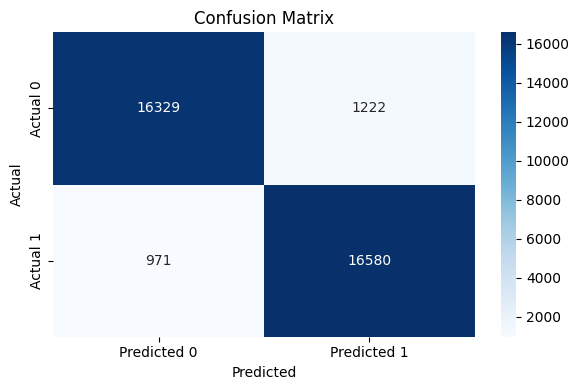

In [ ]:
# 5. Execute Federated Learning
print("Starting Federated Learning...")
global_model = run_federated_learning(
    train_loader,  # From your preprocessing
    test_loader,   # From your preprocessing
    num_clients=2,
    num_rounds=100,
    use_dp=True     # Set to False to disable DP
)